In [ ]:
"""
Code base for visualizing measurements made as part of the 
NASA AERONET sun photometer network monitoring aerosol optical depth
Several components:
(1) Read the txt data provided from the current NASA AERONET website and load into database
    This needs to be updated, but not too regularly as not yet a 'real-time' network, 
    so will involve repeating the reprocessing step (2) each time (e.g. weekly/monthly).
(2) Perform set of common statistical analysis on the data so that this can be archived.
    e.g. combining years of hourly data into climatologic monthly means
    This will save time when common requests are made by users.
(3) User Interface - this will require text boxes and a map for data selection
    as well as a code entry line so advanced users can quickly make requests.
(4) Output panel - common statistics and figures will be output for the selected sites.
"""

In [2]:
#!pip install seaborn
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 100)
from pandas import Series, DataFrame
#read in AERONET data
from datetime import datetime



In [ ]:
def load_aeronet(byname="",bydate="",bylocation=""):
  """several ways to extract AERONET data from the archive"""

class site(object):
  """An AERONET site object"""
  """Attributes:
     Name
     ID
     Start Date
     End Date
     Longitude
     Latitude
     Elevation
     AOD @ 440nm [pre-process daily, hourly, morning, afternoon]
     AOD @ 870nm [pre-process daily, hourly, morning, afternoon]
     AOD @ 500nm [pre-process daily, hourly, morning, afternoon]
     Fine AOD fraction [associated ith 500nm O'Neill retrieval]
     SSA
     Angstrom Exponent (870/440)
  """
def 

C:\Users\davea\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
C:\Users\davea\Anaconda3\lib\site-packages\ipykernel\__main__.py:71: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
C:\Users\davea\Anaconda3\lib\site-packages\ipykernel\__main__.py:77: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


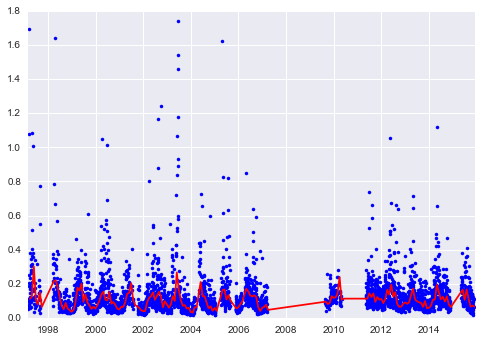

In [7]:

"""Load in the model data
   Eventually this should come from a user request
   based on the name, location or time.
"""
#daves dir and dates
adir = "C:\\Users\\davea\\\Dropbox (MIT)\\data\\AERONET\\AOT\\LEV20\\DAILY\\"
adate="920801_170708"
#dans dir and dates
#adir = "C:\\Users\\davea\\\Dropbox (MIT)\\data\\AERONET\\AOT\\LEV20\\DAILY\\"
#adate="920801_170708"
afile=adate+"_Dalanzadgad.lev20"
d2 = pd.read_csv(adir+afile,skiprows=[0,1,2,3],header=0,parse_dates=[0,1])

afile="920801_170708_Capo_Verde.lev20"
d1 = pd.read_csv(adir+afile,skiprows=[0,1,2,3],header=0,parse_dates=[0,1])

afile="920801_170708_Dakar.lev20"
d0 = pd.read_csv(adir+afile,skiprows=[0,1,2,3],header=0,parse_dates=[0,1])

afile="920801_170708_MD_Science_Center.lev20"
d3 = pd.read_csv(adir+afile,skiprows=[0,1,2,3],header=0,parse_dates=[0,1])
#datetime.year(stn['Date(dd-mm-yy)'])
#sns.set()
#stn_rect = stn.pivot("Julian_Day", "AOT_1020", "AOT_440")
#sns.pairplot(stn_rect, hue="AOT_440", size=2.5)
#strdate = DataFrame(stn,columns=[0])
#strdate = 
#date_object = datetime.strptime(strdate, '%d:%m:%Y')

color = sns.color_palette()[3]
#g = sns.jointplot("AOT_440", "AOT_1020", data=stn, kind="reg",
#                  xlim=(0, 1), ylim=(0, 1), color=color, size=7)
def f(df):
    df = df.copy()
    df['Date(dd-mm-yy)'] = pd.to_datetime(df['Date(dd-mm-yy)'], format='%d:%m:%Y')
    df['Year'] = pd.DatetimeIndex(df['Date(dd-mm-yy)']).year
    df['Month'] = pd.DatetimeIndex(df['Date(dd-mm-yy)']).month
    df['Day'] = pd.DatetimeIndex(df['Date(dd-mm-yy)']).day
    df.fillna(0)
    df=df[['Date(dd-mm-yy)','AOT_440','AOT_675','AOT_870','AOT_1020','440-870Angstrom']]
    df = df.set_index('Date(dd-mm-yy)')
    df = df.dropna()
    df = df.fillna(0)
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Day'] = df.index.day
    return df
stn2b=f(d2)
stn3b=f(d3)
stn1b=f(d1)
stn0b=f(d0)
#stn1.fillna(0)

#stn3 = stn2.set_index(pd.DatetimeIndex(stn2['Date(dd-mm-yy)']))
#stn3=stn2[['Date(dd-mm-yy)','AOT_440']]
#stn2.head

#stn1b=stn1[['Date(dd-mm-yy)','AOT_440','AOT_675','AOT_870','AOT_1020','440-870Angstrom']]
#def _sum(x):
#   if len(x) == 0: return 0
#   else: return sum(x)

#stn3=f(stn3)

#stn1b=f(stn1b)
#stn1b = stn1b.set_index('Date(dd-mm-yy)')
#stn1b = stn1b.dropna()
#stn1b = stn1b.fillna(0)
#stn1b['Year'] = stn1b.index.year
#stn1b['Month'] = stn1b.index.month

stnmd= stn2b[['AOT_440','AOT_675','AOT_870','AOT_1020','440-870Angstrom']].resample('M', how='mean')
stnmd = stnmd.dropna()
stnmd = stnmd.fillna(0)
stnmn= stn2b[['AOT_440','AOT_675','AOT_870','AOT_1020','440-870Angstrom']].resample('M', how='median')
stnmn = stnmn.dropna()
stnmn = stnmn.fillna(0)


#stn3 = stn3.set_index('Date(dd-mm-yy)')
stn2c = stn2b[['AOT_440','440-870Angstrom']].resample('M', how='mean')
#stn4 = stn4[['440-870Angstrom']].resample('M', how='mean')
stn2c = stn2c.dropna()
stn2c = stn2c.fillna(0)
stn2c['Year'] = stn2c.index.year
stn2c['Month'] = stn2c.index.month

stn_rect = stn2c.pivot('Year','Month','AOT_440')
stn_rect2 = stn2c.pivot('Year','Month','440-870Angstrom')
#stn_rect = stn_rect.ix[stn2.onth.iloc[:12]]
#stn3.head

stn_rect.head
#sns.heatmap(stn_rect)
stn2b.head


#plt.plot(stn4.index, stn4['AOT_440'], 'r', stn4.index, stn4['AOT_675'], 'b', stn4.index, stn4['AOT_870'], 'g')
plt.plot(stn2b.index, stn2b['AOT_440'], 'b.',stnmn.index, stnmn['AOT_440'], 'r')
plt.show()


In [ ]:
stn1b

In [ ]:
sns.set(style="white", palette="GnBu_d")
sns.set_palette("husl")
#f, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True)
#sns.despine(left=True)

#b, g, r, p = sns.color_palette("muted", 4)
#sns.distplot(stn3['AOT_440'], color=p)

#sns.pairplot(stn4[['AOT_440','AOT_870','440-870Angstrom','Month']], hue="Month", size=4.0)
dat=stn2b[['Year','Month','Day','AOT_440','AOT_1020']]
dat=stn2b[['Month','AOT_440']]
dat['index']=dat.index
dat['Dalanzadgad']=np.log10(stn2b['AOT_440'])
dat['Cape_Verde']=np.log10(stn1b['AOT_440'])
dat['Dakar']=np.log10(stn0b['AOT_440'])
dat['Maryland']=np.log10(stn3b['AOT_440'])
dat2=dat.groupby('Month')

fig, ax = plt.subplots(figsize=(8,6))
#plt.ylim((0,0.5))
fig2, ax2 = plt.subplots(figsize=(4,3))
#stn2b[['Month','AOT_440']].groupby('Month').mean().plot(kind='line', ax=ax)
dat[['Month','Cape_Verde','Dalanzadgad','Dakar','Maryland']].groupby('Month').mean().plot(kind='line', ax=ax)
###pd.melt(dat[['Month','AOT_440']],id_vars=['Month'])
###pd.pivot(dat[['Month','AOT_440']],index='AOT_440')
#dat3=dat.pivot(index="index", columns='Month', values='AOT_440')
#dat3.plot(kind='box', ax=ax)
dat[['Cape_Verde','Dalanzadgad','Dakar','Maryland']].plot(kind='hist', ax=ax2, alpha=0.5)
fig3, ax3 = plt.subplots(figsize=(8,6))
dat[['Month','Cape_Verde','Dalanzadgad','Dakar','Maryland']].groupby('Month').mean().plot(kind='bar', ax=ax3)

In [ ]:
sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")
dat0=dat[['Month','Cape_Verde','Dalanzadgad','Dakar','Maryland']]
#dat0['Cape_Verde']=10.0**dat0['Cape_Verde']
#dat0['Dalanzadgad']=10.0**dat0['Dalanzadgad']
#dat0['Dakar']=10.0**dat0['Dakar']
#dat0['Maryland']=10.0**dat0['Maryland']

# Draw a nested boxplot to show bills by day and sex
#sns.boxplot(x="Month", y="value", hue="site", data=dat0, palette="husl")
#sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
#sns.despine(offset=10, trim=True)
dat00=pd.melt(dat0, id_vars='Month', value_vars=['Cape_Verde','Dalanzadgad','Dakar','Maryland'],value_name="logAOD",var_name="Site")
sns.boxplot(x="Month", y="logAOD", hue="Site", data=dat00, palette="husl")

In [ ]:
sns.heatmap(stn_rect,vmax=0.5)
#sns.tsplot(data=stn_rect,time="Month")

In [ ]:
sns.heatmap(stn_rect2,vmin=0.0,vmax=1.5)

In [ ]:
stn2['DayList']=stn2['Julian_Day']+365*(stn2['Year']-2009)
dat=stn2[['DayList','AOT_440','AOT_675','AOT_870','AOT_1020']]
#d1 = pd.DataFrame(dat, columns = ['AOT_440','AOT_675'])
d2 = pd.melt(dat, id_vars=['DayList'], var_name='WV', value_name='value')
d2['index']=d2.index
#d2 = d1.stack()
#sns.tsplot(data=d2,unit="Julian_Day" time="Julian_Day",condition="WV", value="value")
d2.fillna(0)


In [ ]:
sns.set(palette="hls", style="white")
stn2.plot(y=['AOT_440','AOT_870','AOT_675','AOT_1020'])
#sns.tsplot(data=d2, time="index", value="value")

In [ ]:
d2=dat.stack()
#d2.columns.values[1]='WV'
type(d2)